# Определение перспективного тарифа для телеком-компании

**Входные данные**

Выборка, состоящая из 500 пользователей телеком-компании, со следующими данными: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

Описание тарифов:

Смарт

* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
    * минута разговора: 3 рубля
    * сообщение: 3 рубля
    * 1 Гб интернет-трафика: 200 рублей
    
    
Ультра

* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
    * минута разговора: 1 рубль
    * сообщение: 1 рубль
    * 1 Гб интернет-трафика: 150 рублей
    
Правила тарификации:

Оператор всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.


**Задача**

Проанализировать поведение клиентов и сделать вывод — какой тариф приносит больше денег. Это поможет коммерческому департаменту понять, каким образом скорректировать рекламный бюджет.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#users" data-toc-modified-id="users-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>users</a></span></li><li><span><a href="#tariffs" data-toc-modified-id="tariffs-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>tariffs</a></span></li><li><span><a href="#calls" data-toc-modified-id="calls-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>calls</a></span></li><li><span><a href="#messages" data-toc-modified-id="messages-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>messages</a></span></li><li><span><a href="#internet" data-toc-modified-id="internet-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>internet</a></span></li><li><span><a href="#Дополнительные-расчеты" data-toc-modified-id="Дополнительные-расчеты-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Дополнительные расчеты</a></span></li></ul></li><li><span><a href="#Анализ-поведения-клиентов" data-toc-modified-id="Анализ-поведения-клиентов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ поведения клиентов</a></span><ul class="toc-item"><li><span><a href="#Данные-по-звонкам" data-toc-modified-id="Данные-по-звонкам-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Данные по звонкам</a></span></li><li><span><a href="#Данные-по-сообщениям" data-toc-modified-id="Данные-по-сообщениям-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Данные по сообщениям</a></span></li><li><span><a href="#Данные-по-интернет-трафику" data-toc-modified-id="Данные-по-интернет-трафику-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Данные по интернет-трафику</a></span></li><li><span><a href="#Данные-по-выручке" data-toc-modified-id="Данные-по-выручке-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Данные по выручке</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Cредняя-выручка-пользователей-тарифов-&quot;Ультра&quot;-и-&quot;Смарт&quot;-различаются" data-toc-modified-id="Cредняя-выручка-пользователей-тарифов-&quot;Ультра&quot;-и-&quot;Смарт&quot;-различаются-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Cредняя выручка пользователей тарифов "Ультра" и "Смарт" различаются</a></span></li><li><span><a href="#Средняя-выручка-пользователей-из-Москвы-отличается-от-выручки-пользователей-из-других-регионов" data-toc-modified-id="Средняя-выручка-пользователей-из-Москвы-отличается-от-выручки-пользователей-из-других-регионов-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Изучение данных

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
from scipy import stats as st

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Отключение варнингов
import warnings
warnings.filterwarnings('ignore')

Выведем общую информацию о представленных таблицах:

In [2]:
users = pd.read_csv('/datasets/users.csv')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Таблица `users` содержит информацию о пользователях:
- user_id — уникальный идентификатор пользователя
- age — возраст пользователя (годы)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- reg_date — дата подключения тарифа (день, месяц, год)
- tariff — название тарифного плана

In [3]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Таблица `tariffs` содержит информацию о тарифах:
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- tariff_name — название тарифа

In [4]:
calls = pd.read_csv('/datasets/calls.csv')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Таблица `calls` содержит информацию о звонках:
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

In [5]:
internet = pd.read_csv('/datasets/internet.csv')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Таблица `internet` содержит информацию об интернет-сессиях:
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

In [6]:
messages = pd.read_csv('/datasets/messages.csv')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Таблица `messages` содержит информацию о сообщениях:
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

## Предобработка данных

### users

Приведем столбцы с датами к формату datetime.

In [7]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

### tariffs

Так как по правилам компании мегабайты, потраченные за месяц, округляются до гигабайт, создадим столбец с количеством гигабайт, включенных в тариф (чтобы все измерялось в одних и тех же единицах). Также для удобства получения значений из таблицы установим название тарифа в качестве индекса

In [8]:
# Создание столбца с количеством включенных в тариф гб
tariffs['gb_per_month_included'] = (tariffs['mb_per_month_included'] / 1024).astype('int')

# Установка tariff_name в качестве индекса таблицы
tariffs = tariffs.set_index('tariff_name')

tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
tariff_name,,,,,,,,
smart,50,15360,500,550,200,3,3,15
ultra,1000,30720,3000,1950,150,1,1,30


### calls

Приведем столбец с датой совершения звонка к формату datetime, создадим столбец с месяцем совершения звонка. 

По правилам оператора секунды округляются до минут. Причем каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута. Методом ceil округлим значения в столбце duration до большего целого.

In [9]:
# Изменение типа данных в столбце call_date на datetime
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

# Создание столбца с месяцем совершения звонка
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

# Округление длительности звонка до большего целого и приведение к типу int
calls['duration'] = np.ceil(calls['duration']).astype('int')

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
 4   month      202607 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 7.7+ MB


### messages

Аналогично таблице calls приведем столбец с датой отправки сообщения к формату datetime, создадим столбец с месяцем.

In [10]:
# Изменение типа данных в столбце message_date на datetime
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

# Создание столбца с месяцем отправки сообщения
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
 3   month         123036 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB


### internet

В таблице присутствует столбец `Unnamed: 0`, дублирующий индексы, — его можно удалить. Кроме того есть записи с нулевыми сессиями, которые никак не отражаются в подсчетах — их также удалим.

Аналогично предыдущим таблицам обработаем столбец с датой.

In [11]:
# Удаление столбца Unnamed:0
internet = internet.drop(columns='Unnamed: 0')

# Удаление строк с нулевыми сессиями
internet = internet.query('mb_used > 0')

# Изменение типа данных в столбце session_date на datetime
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

# Создание столбца с месяцем сессии
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            129798 non-null  object        
 1   mb_used       129798 non-null  float64       
 2   session_date  129798 non-null  datetime64[ns]
 3   user_id       129798 non-null  int64         
 4   month         129798 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.9+ MB


### Дополнительные расчеты

Создадим вспомогательную таблицу, которая будет содержать данные по каждому пользователю:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя.

При объединении данных могут появиться пропуски (например, клиент отправлял сообщения, но не сделал ни одного звонка за месяц и т.д.). Так как тариф все равно используется, заменим такие пропуски на 0.

In [12]:
# Создание таблицы с количеством сделанных звонков каждым пользователем по месяцам
calls_per_month = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc='count')

# Создание таблицы с общей длительностью сделанных звонков каждым пользователем по месяцам
minutes_per_month = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc='sum')

# Создание таблицы с количеством отправленных сообщений каждым пользователем по месяцам
messages_per_month = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')

# Создание таблицы с количеством израсходованных мб интернет-трафика каждым пользователем по месяцам
# и округление мб за месяц до гб по правилам оператора (округление вверх)
internet_per_month = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
internet_per_month = np.ceil(internet_per_month / 1024).astype('int')

# Объединение созданных таблиц в одну с данными по каждому пользователю
data_per_month = calls_per_month.join(minutes_per_month, how='outer', lsuffix='_calls') \
                                  .join(messages_per_month, how='outer') \
                                  .join(internet_per_month, how='outer') \
                                  .fillna(0)\
                                  .astype('int')
data_per_month.columns = ['calls', 'minutes', 'messages', 'internet']
data_per_month.head(15)

calls  minutes  messages  internet
user_id month                                    
1000    5         22      159        22         3
        6         43      172        60        23
        7         47      340        75        14
        8         52      408        81        14
        9         58      466        57        15
        10        57      350        73        15
        11        43      338        58        15
        12        46      333        70        10
1001    11        59      430         0        18
        12        63      414         0        14
1002    6         15      117         4        11
        7         26      214        11        18
        8         42      289        13        20
        9         36      206         4        17
        10        33      212        10        14

Добавим в созданную таблицу данные о тарифе (чтобы рассчитать выручку с каждого пользователя) и городе (для проверки гипотез):

In [13]:
data_per_month = data_per_month.join(users[['user_id', 'tariff', 'city']].set_index('user_id'))
data_per_month.head(15)

calls  minutes  messages  internet tariff         city
user_id month                                                        
1000    5         22      159        22         3  ultra    Краснодар
        6         43      172        60        23  ultra    Краснодар
        7         47      340        75        14  ultra    Краснодар
        8         52      408        81        14  ultra    Краснодар
        9         58      466        57        15  ultra    Краснодар
        10        57      350        73        15  ultra    Краснодар
        11        43      338        58        15  ultra    Краснодар
        12        46      333        70        10  ultra    Краснодар
1001    11        59      430         0        18  smart       Москва
        12        63      414         0        14  smart       Москва
1002    6         15      117         4        11  smart  Стерлитамак
        7         26      214        11        18  smart  Стерлитамак
        8         42      289        13        20  smart  Стерлитамак
        9         36      206         4        17  smart  Стерлитамак
        10        33      212        10        14  smart  Стерлитамак

Создадим функцию для расчета выручки пользователей по месяцам и вызовем ее для созданной таблицы:

In [14]:
# Функция для расчета выручки
def calc_income(row):
    row['income'] = tariffs['rub_monthly_fee'][row['tariff']]                      # Выручка за месяц равна тарифной плате
    overmins = row['minutes'] - tariffs['minutes_included'][row['tariff']]         # Расчет доп минут (сверх тарифного пакета)
    if overmins > 0:
        row['income'] += overmins * tariffs['rub_per_minute'][row['tariff']]       # Добавление к выручке платы за доп минуты
    overmessages = row['messages'] - tariffs['messages_included'][row['tariff']]   # Расчет доп сообщений
    if overmessages > 0:
        row['income'] += overmessages * tariffs['rub_per_message'][row['tariff']]  # Добавление к выручке платы за доп сообщения
    overgb = row['internet'] - tariffs['gb_per_month_included'][row['tariff']]     # Расчет доп гб
    if overgb > 0:
        row['income'] += overgb * tariffs['rub_per_gb'][row['tariff']]             # Добавление к выручке платы за доп гб
    return row

In [15]:
# Вызов функции к данным по использованным услугам по месяцам
data_per_month = data_per_month.apply(calc_income, axis=1)
data_per_month.head(15)

calls  minutes  messages  internet tariff         city  income
user_id month                                                                
1000    5         22      159        22         3  ultra    Краснодар    1950
        6         43      172        60        23  ultra    Краснодар    1950
        7         47      340        75        14  ultra    Краснодар    1950
        8         52      408        81        14  ultra    Краснодар    1950
        9         58      466        57        15  ultra    Краснодар    1950
        10        57      350        73        15  ultra    Краснодар    1950
        11        43      338        58        15  ultra    Краснодар    1950
        12        46      333        70        10  ultra    Краснодар    1950
1001    11        59      430         0        18  smart       Москва    1150
        12        63      414         0        14  smart       Москва     550
1002    6         15      117         4        11  smart  Стерлитамак     550
        7         26      214        11        18  smart  Стерлитамак    1150
        8         42      289        13        20  smart  Стерлитамак    1550
        9         36      206         4        17  smart  Стерлитамак     950
        10        33      212        10        14  smart  Стерлитамак     550

Проверим, сохранились ли в сводной таблице данные о всех пользователях из исходного датасета:

In [17]:
# Число пользователей в сводной таблице
len(data_per_month.unstack())

498

In [18]:
# Число пользователей в исходном датасете
len(users)

500

Отсутствуют данные по двум клиентам, так как они не пользовались услугами. Чтобы выяснить причину, просмотрим всю информацию по этим пользователям.

In [19]:
# Определим id пропущенных клиентов
aft_users = np.array(data_per_month.unstack().index)
bef_users = np.array(users['user_id'])

for user in bef_users:
    if user not in aft_users:
        print(user)

1128
1371


In [20]:
# Выведем данные из таблицы users по пропущенным клиентам
users.query('user_id in [1128, 1371]')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


Первый клиент подключил тариф на 8 дней, второй — на 5. При этом никаких услуг использовано не было. В описании тарифа нет пояснений, снимается ли с таких пользователей ежемесяная тарифная плата (возможно, есть какой-то пробный период). Но в любом случае таких клиентов всего 2 и их данные не отражают поведение пользователей тарифов (нет услуг), поэтому принято решение не включать их в сводную таблицу.

## Анализ поведения клиентов

### Данные по звонкам

Сравним, сколько минут в месяц тратят пользователи каждого тарифа.

In [21]:
# Основные статистики для тарифа Смарт по всем месяцам
data_per_month.query('tariff=="smart"')['minutes'].describe()

count    2229.000000
mean      417.934948
std       190.313730
min         0.000000
25%       282.000000
50%       422.000000
75%       545.000000
max      1435.000000
Name: minutes, dtype: float64

In [22]:
# Основные статистики для тарифа Ультра по всем месяцам
data_per_month.query('tariff=="ultra"')['minutes'].describe()

count     985.000000
mean      526.623350
std       317.606098
min         0.000000
25%       284.000000
50%       518.000000
75%       752.000000
max      1673.000000
Name: minutes, dtype: float64

<AxesSubplot:xlabel='minutes', ylabel='Count'>

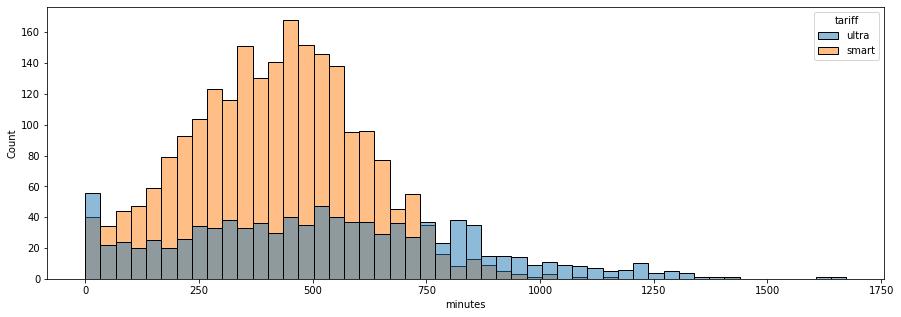

In [23]:
# Гистограмма распределения израсходованных минут в месяц по тарифам
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)
sns.histplot(data_per_month, x='minutes', hue='tariff', bins=50, ax=ax)

Чтобы проверить, отличаются ли статистики по месяцам, построим ящики с усами по каждому месяцу.

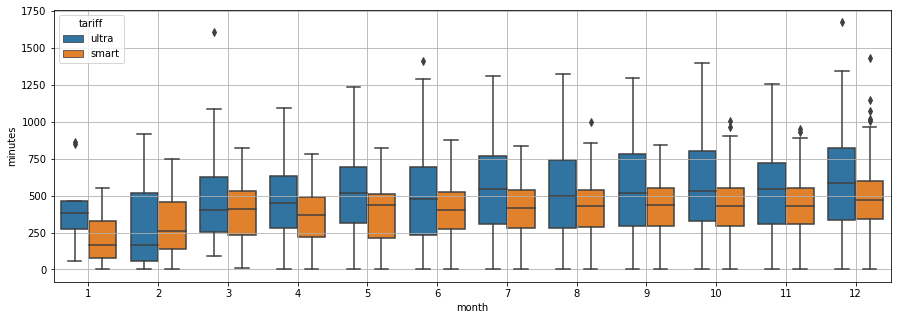

In [24]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)
sns.boxplot(x='month', y='minutes', data=data_per_month.reset_index(), hue='tariff', ax=ax)
plt.grid()

Как и в целом, так и по месяцам, пользователи тарифа "Смарт" в среднем используют меньше минут в месяц (кроме февраля, где медиана оказалась больше приблизительно на 100 минут, и марта — где они равны).

Несмотря на то, что в тариф "Ультра" включено 3000 минут разговора, 75% пользователей не тратят больше 752 минут. Есть отдельные выбросы, но даже они не превышают 1700 минут. Пользователи тарифа "Смарт", напротив, часто доплачивают за потраченные минуты: четверть пользователей тратит больше 545 минут (из 500, включенных в тариф).


На первый взгляд разброс значений по месяцам у пользователей тарифа "Ультра" гораздо выше. Проверим это, рассчитав среднее, дисперсию и стандартное отклонение.

In [25]:
# Создание сводной таблицы с группировкой по месяцам и тарифам
# и расчетом среднего, дисперсии и стандартного отклонения
calls_data = data_per_month.pivot_table(index=['month', 'tariff'], values='minutes', aggfunc=[np.mean, np.var, np.std])
calls_data.columns = ['mean', 'var', 'std']
calls_data

mean            var         std
month tariff                                       
1     smart   203.852941   23787.341355  154.231454
      ultra   428.111111   72769.361111  269.757968
2     smart   298.689655   36412.287961  190.820041
      ultra   297.125000   87919.679348  296.512528
3     smart   390.051948   36823.155161  191.893604
      ultra   489.648649  111384.900901  333.743765
4     smart   367.133929   34778.207127  186.489161
      ultra   458.018182   71653.870034  267.682405
5     smart   387.361702   34820.061094  186.601343
      ultra   510.328358   83870.193578  289.603511
6     smart   395.640244   30742.918861  175.336587
      ultra   479.702381   91535.946500  302.549081
7     smart   408.353234   32250.269602  179.583601
      ultra   545.791209   94322.278144  307.119322
8     smart   421.468085   34793.583379  186.530382
      ultra   510.775701   97956.496385  312.980026
9     smart   428.611538   33535.342723  183.126576
      ultra   539.443478  105716.775286  325.141162
10    smart   426.136054   35392.336375  188.128510
      ultra   558.081301  106464.583500  326.289110
11    smart   435.265823   31605.237050  177.778618
      ultra   541.380597   96570.057064  310.757232
12    smart   478.560831   39698.622033  199.245131
      ultra   592.805755  117276.331561  342.456321

Изобразим полученные значения на гистограммах:

<AxesSubplot:xlabel='std', ylabel='Count'>

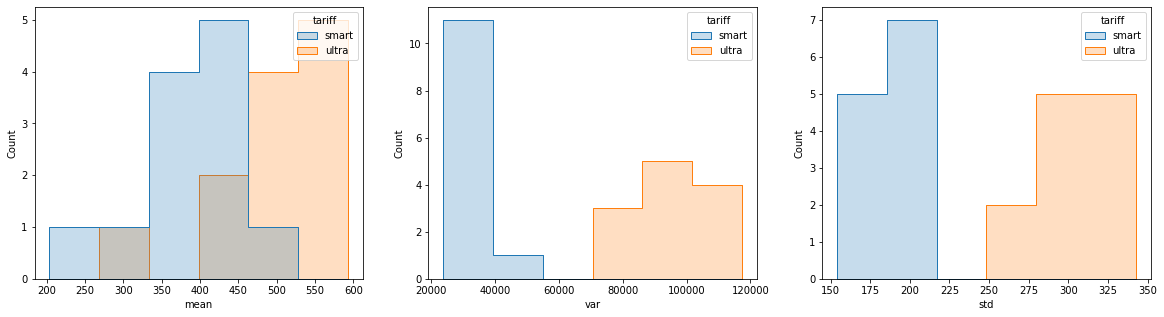

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))
sns.histplot(calls_data, x='mean', hue='tariff', element='step', ax=axes[0])
sns.histplot(calls_data, x='var', hue='tariff', element='step', ax=axes[1])
sns.histplot(calls_data, x='std', hue='tariff', element='step', ax=axes[2])

Действительно, распределения всех статистик для тарифа "Ультра" смещены вправо. Длительность совершенных за месяц звонков в среднем больше приблизительно на 100 минут, значения разбросаны сильнее. 

### Данные по сообщениям

Сравним, сколько сообщений в месяц отправляют пользователи каждого тарифа.

In [27]:
# Основные статистики для тарифа Смарт по всем месяцам
data_per_month.query('tariff=="smart"')['messages'].describe()

count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: messages, dtype: float64

In [28]:
# Основные статистики для тарифа Ультра по всем месяцам
data_per_month.query('tariff=="ultra"')['messages'].describe()

count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: messages, dtype: float64

<AxesSubplot:xlabel='messages', ylabel='Count'>

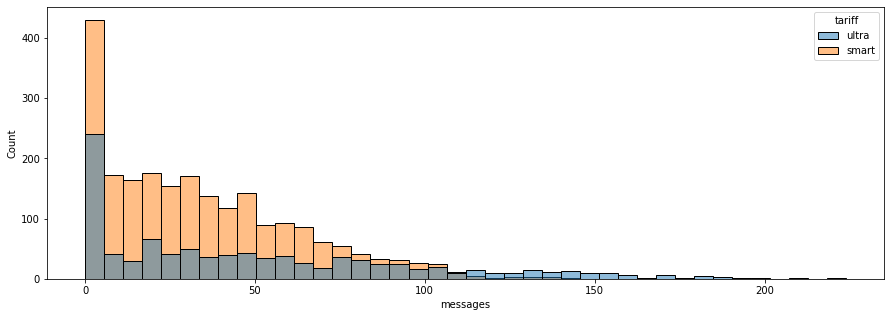

In [29]:
# Гистограмма распределения числа отправленных сообщений в месяц по тарифам
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)
sns.histplot(data_per_month, x='messages', hue='tariff', bins=40, ax=ax)

Пстроим ящики с усами по каждому месяцу:

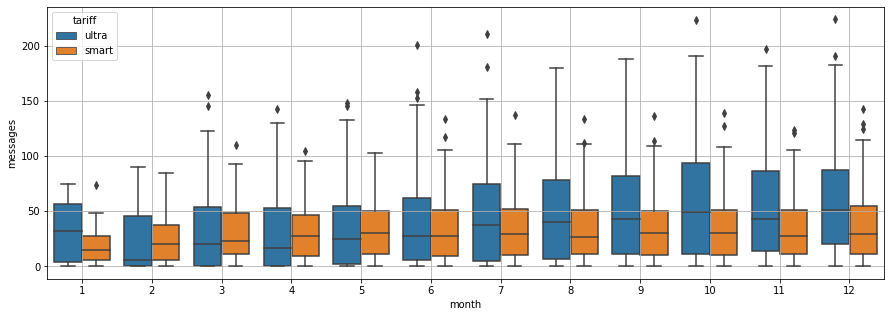

In [30]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)
sns.boxplot(x='month', y='messages', data=data_per_month.reset_index(), hue='tariff', ax=ax)
plt.grid()

Наблюдается пик у нуля для обоих тарифов (везде есть пользователи, которые вообще не отправляеют сообщения). В целом пользователи "Ультра" отправляют больше сообщений (медиана равна 38 против 28 для тарифа "Смарт", на гистограмме хвост справа длиннее). Но если посмотреть на данные по месяцам, то с февраля по май медиана отправленных сообщений для пользователей "Смарт" была выше, в июне — равна.

Изучим подробнее, насколько сильно разбросаны данные.

In [31]:
# Создание сводной таблицы с группировкой по месяцам и тарифам
# и расчетом среднего, дисперсии и стандартного отклонения
messages_data = data_per_month.pivot_table(index=['month', 'tariff'], values='messages', aggfunc=[np.mean, np.var, np.std])
messages_data.columns = ['mean', 'var', 'std']
messages_data

mean          var        std
month tariff                                   
1     smart   18.235294   262.367201  16.197753
      ultra   33.777778   940.694444  30.670742
2     smart   24.086207   473.097701  21.750809
      ultra   21.958333   716.824275  26.773574
3     smart   31.857143   718.492481  26.804710
      ultra   32.297297  1732.381381  41.621886
4     smart   30.741071   602.139559  24.538532
      ultra   31.563636  1407.287542  37.513831
5     smart   33.773050   730.990983  27.036845
      ultra   37.850746  1624.644052  40.306874
6     smart   33.402439   806.806374  28.404337
      ultra   41.726190  1986.297619  44.567899
7     smart   33.751244   799.887811  28.282288
      ultra   49.846154  2372.042735  48.703621
8     smart   33.638298   838.257501  28.952677
      ultra   48.439252  2171.739199  46.601923
9     smart   33.638462   790.617820  28.117927
      ultra   52.286957  2152.855530  46.398874
10    smart   33.765306   816.111966  28.567673
      ultra   58.430894  2697.181661  51.934398
11    smart   34.075949   805.937071  28.389031
      ultra   55.791045  2476.948491  49.768951
12    smart   35.994065   934.952346  30.576990
      ultra   60.611511  2681.978417  51.787821

Изобразим полученные значения на гистограммах:

<AxesSubplot:xlabel='std', ylabel='Count'>

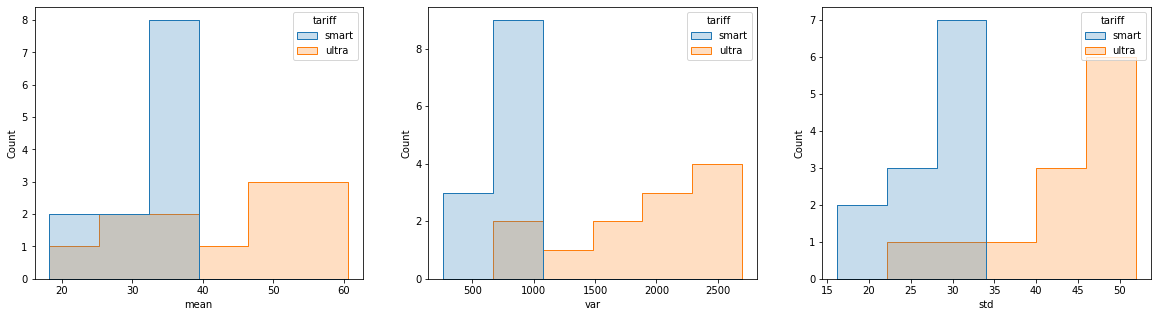

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))
sns.histplot(messages_data, x='mean', hue='tariff', element='step', ax=axes[0])
sns.histplot(messages_data, x='var', hue='tariff', element='step', ax=axes[1])
sns.histplot(messages_data, x='std', hue='tariff', element='step', ax=axes[2])

Распределения статистик для сообщений, как и для звонков, смещены вправо.

### Данные по интернет-трафику

Сравним, какой объем интернет-трафика требуется пользователям каждого тарифа в месяц.

In [33]:
# Основные статистики для тарифа Смарт по всем месяцам
data_per_month.query('tariff=="smart"')['internet'].describe()

count    2229.000000
mean       16.328847
std         5.747061
min         0.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        38.000000
Name: internet, dtype: float64

In [34]:
# Основные статистики для тарифа Ультра по всем месяцам
data_per_month.query('tariff=="ultra"')['internet'].describe()

count    985.000000
mean      19.494416
std        9.853511
min        0.000000
25%       12.000000
50%       19.000000
75%       27.000000
max       49.000000
Name: internet, dtype: float64

<AxesSubplot:xlabel='internet', ylabel='Count'>

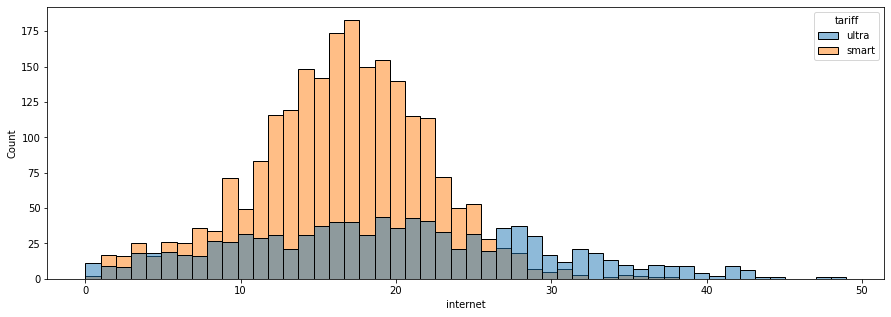

In [35]:
# Гистограмма распределения объема потраченного интернет-трафика в месяц по тарифам
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)
sns.histplot(data_per_month, x='internet', hue='tariff', bins=50, ax=ax)

Построим ящики с усами по каждому месяцу.

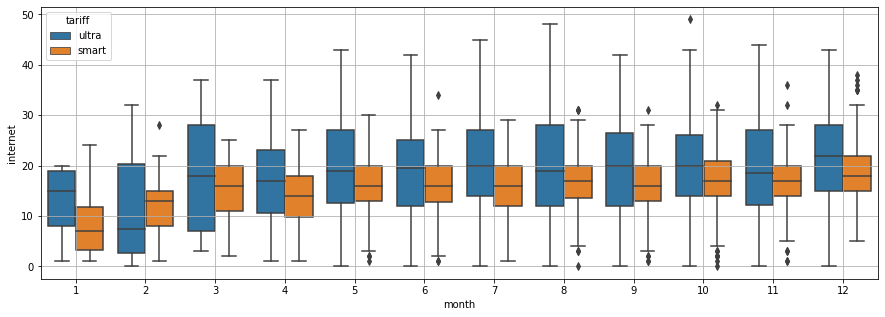

In [36]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)
sns.boxplot(x='month', y='internet', data=data_per_month.reset_index(), hue='tariff', ax=ax)
plt.grid()

В целом распределения объема интернет-трафика больше всего напоминают нормальные.

Пользователи тарифа "Ультра" расходуют больше интернет-трафика, причем четверть из них тратит больше 27гб в месяц. Это единственная услуга, по которой возможности тарифа используются в полном объеме, приходится даже доплачивать. 

Пользователям "Смарт" явно не хватает включенных в тариф гб. Больше половины из них вынуждены доплачивать за дополнительные гб.

In [37]:
# Создание сводной таблицы с группировкой по месяцам и тарифам
# и расчетом среднего, дисперсии и стандартного отклонения
internet_data = data_per_month.pivot_table(index=['month', 'tariff'], values='internet', aggfunc=[np.mean, np.var, np.std])
internet_data.columns = ['mean', 'var', 'std']
internet_data

mean         var        std
month tariff                                  
1     smart    8.735294   39.412656   6.277950
      ultra   13.222222   44.444444   6.666667
2     smart   11.844828   37.150938   6.095157
      ultra   12.000000  109.130435  10.446551
3     smart   15.233766   32.549897   5.705252
      ultra   17.648649  114.345345  10.693238
4     smart   13.625000   31.299550   5.594600
      ultra   16.963636   89.443098   9.457436
5     smart   15.907801   34.370010   5.862594
      ultra   19.373134   95.631389   9.779130
6     smart   15.951220   31.911716   5.649046
      ultra   18.940476   82.394005   9.077114
7     smart   15.875622   33.419453   5.780956
      ultra   20.505495   96.430525   9.819905
8     smart   16.736170   30.041207   5.480986
      ultra   19.598131  105.148298  10.254184
9     smart   16.392308   25.884110   5.087643
      ultra   19.243478   86.255988   9.287410
10    smart   16.880952   32.897042   5.735594
      ultra   20.065041   91.258030   9.552907
11    smart   17.000000   27.180952   5.213535
      ultra   19.805970   93.796656   9.684867
12    smart   18.201780   29.786544   5.457705
      ultra   21.741007  103.236784  10.160550

<AxesSubplot:xlabel='std', ylabel='Count'>

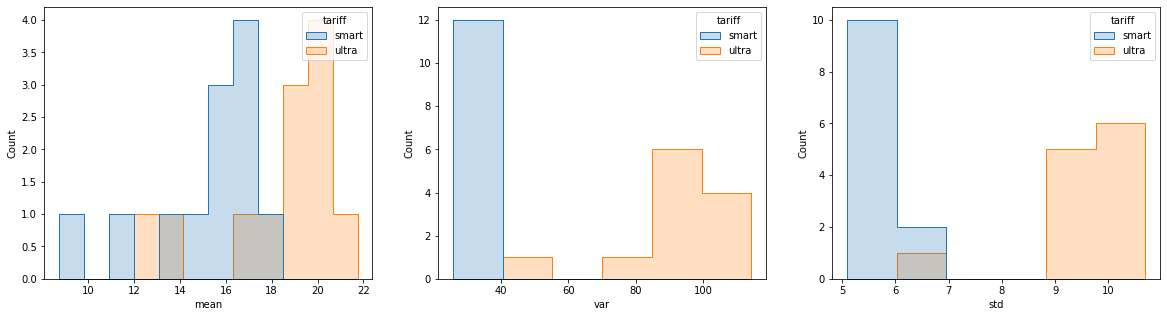

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))
sns.histplot(internet_data, x='mean', hue='tariff', element='step',bins=12, ax=axes[0])
sns.histplot(internet_data, x='var', hue='tariff', element='step', ax=axes[1])
sns.histplot(internet_data, x='std', hue='tariff', element='step', ax=axes[2])

Распределения смещены вправо, причем пик для тарифа "Смарт" приходится на 16гб в мес., что превышает объем, включенный в пакет. Значения тарифа "Ультра" разбросаны сильнее.

### Данные по выручке

In [39]:
# Основные статистики для тарифа Смарт по всем месяцам
data_per_month.query('tariff=="smart"')['income'].describe()

count    2229.000000
mean     1289.973531
std       818.404367
min       550.000000
25%       550.000000
50%      1023.000000
75%      1750.000000
max      6770.000000
Name: income, dtype: float64

In [40]:
# Основные статистики для тарифа Ультра по всем месяцам
data_per_month.query('tariff=="ultra"')['income'].describe()

count     985.000000
mean     2070.152284
std       376.187114
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: income, dtype: float64

<AxesSubplot:xlabel='income', ylabel='Count'>

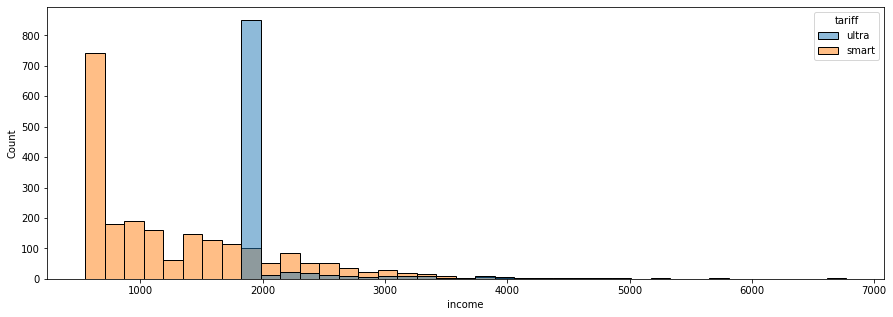

In [41]:
# Гистограмма распределения выручки в месяц по тарифам
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)
sns.histplot(data_per_month, x='income', hue='tariff', ax=ax)

Пики у обоих тарифов приходятся на значения, равные тарифной плате. Но пользователи тарифа "Ультра" гораздо реже доплачивают за использование услуг сверх тарифного плана: меньше четверти выборки платили за доп услуги, в то время как у "Смарт" — больше половины.

Посмотрим, как изменялась выручка с каждого тарифа по месяцам:

<AxesSubplot:xlabel='month', ylabel='income'>

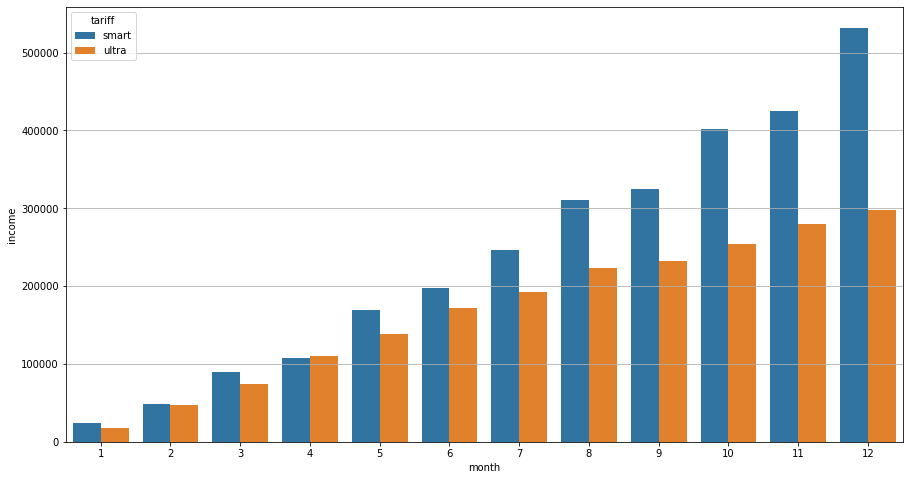

In [42]:
# Создание сводной таблицы с группировкой по месяцам и тарифам
# и расчет суммы выручки за месяц
income_data = data_per_month.pivot_table(index=['month', 'tariff'], values='income', aggfunc='sum')

# Построение столбчатого графика по месяцам
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
ax.grid()
sns.barplot(data=income_data.reset_index(), x='month', y='income', hue='tariff', ax=ax)

Выручка от обоих тарифов растет, но с разной скоростью. Первые 4 месяца тарифы приносили практически одну и ту же сумму в месяц (отрыв был небольшой), но уже с 5 выручка по тарифу «Смарт» начала расти сильнее. К декабрю разница превысила 200000.

Таким образом, выручка по «Смарт» стремительно растет. Есть основания предполалагать, что этот тариф перспективнее.

## Проверка гипотез

При проверке гипотез о равенстве средних генеральных совокупностей будем применять t-test, так как проводится сравнение двух независимых выборок большого размера. Критический уровень статистической значимости примем равным 5%.

In [43]:
alpha = .05

### Cредняя выручка пользователей тарифов "Ультра" и "Смарт" различаются

Сформулируем нулевую и альтернативную гипотезы:
* $H_0$ — значения средней выручки пользователей тарифов "Ультра" и "Смарт" равны.
* $H_1$ — значения средней выручки пользователей тарифов "Ультра" и "Смарт" не равны

Проверим, отличается ли размер выборок:

In [44]:
display(data_per_month.query('tariff == "smart"')['income'].shape[0])
display(data_per_month.query('tariff == "ultra"')['income'].shape[0])

2229

985

Так как размер выборок отличается, установим `equal_var = False`.

In [45]:
# Проверка гипотезы о равенстве среднего двух генеральных совокупностей
# по двум выборкам: пользователей тарифа Смарт и пользователей тарифа Ультра
results = st.ttest_ind(
    data_per_month.query('tariff == "smart"')['income'],
    data_per_month.query('tariff == "ultra"')['income'],
    equal_var = False
)
print('p-value: ', results.pvalue)

# Сравнение получившегося p-value с заданным уровнем статистической значимости
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Нет оснований отвергнуть нулевую гипотезу") 

p-value:  4.2606313931076085e-250
Отвергаем нулевую гипотезу


**Вывод**. При условии, что гипотеза верна, вероятность получить такие и более отличающиеся значения средних у выборок очень низкая. Поэтому нулевая гипотеза отвергается: значения средней выручки пользователей тарифов "Ультра" и "Смарт" не равны. Это также видно и по полученным выборочным средним, они отличаются почти в два раза:

In [46]:
print('Средняя выручка пользователей Смарт равна', data_per_month.query('tariff == "smart"')['income'].mean())
print('Средняя выручка пользователей Ультра равна', data_per_month.query('tariff == "ultra"')['income'].mean())

Средняя выручка пользователей Смарт равна 1289.9735307312696
Средняя выручка пользователей Ультра равна 2070.1522842639592


### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Сформулируем нулевую и альтернативную гипотезы:
* $H_0$ — значения средней выручки пользователей из Москвы и из других регионов равны.
* $H_1$ — значения средней выручки пользователей из Москвы и из других регионов не равны

Проверим, отличается ли размер выборок:

In [47]:
display(data_per_month.query('city == "Москва"')['income'].shape[0])
display(data_per_month.query('city != "Москва"')['income'].shape[0])

611

2603

Так как размер выборок отличается, установим `equal_var = False`.

In [48]:
# Проверка гипотезы о равенстве среднего двух генеральных совокупностей
# по двум выборкам: пользователей из Москвы и пользователей из других городов
results = st.ttest_ind(
    data_per_month.query('city == "Москва"')['income'],
    data_per_month.query('city != "Москва"')['income'],
    equal_var = False
)
print('p-value: ', results.pvalue)

# Сравнение получившегося p-value с заданным уровнем статистической значимости
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Нет оснований отвергнуть нулевую гипотезу") 

p-value:  0.5257376663729298
Нет оснований отвергнуть нулевую гипотезу


**Вывод**. При условии, что гипотеза верна, вероятность получить такие и более отличающиеся значения средних у выборок больше 50%, что является высоким показателем. Поэтому нет оснований отвергать нулевую гипотезу. Это также видно и по полученным выборочным средним, которые близки друг к другу:

In [49]:
print('Средняя выручка пользователей из Москвы равна', data_per_month.query('city == "Москва"')['income'].mean())
print('Средняя выручка пользователей из других регионов равна', data_per_month.query('city != "Москва"')['income'].mean())

Средняя выручка пользователей из Москвы равна 1546.7135842880523
Средняя выручка пользователей из других регионов равна 1524.9362274298885


## Общий вывод

Выяснили, что средние выручки от тарифов отличаются: тариф "Ультра" приносит больше денег, чем "Смарт". В изученной выборке это значения в месяц по каждому пользователю 2070 и 1289 руб соответственно. Также у этого тарифа стремительнее растет суммарная выручка по месяцам.  Можно сделать вывод, что **скорректировать рекламный бюджет лучше в сторону тарифа "Ультра" (однако для окончательного решения вопроса бюджетирования необходимо оценить прибыль от продаж каждого тарифа)**.

Также стоит отметить, что прибыльность тарифа обоснована тем, что его пользователи вынуждены доплачивать за дополнительные услуги сверх тарифного плана. Это прослеживается в особенностях поведения клиентов:

- В среднем изученной выборке требуется в месяц:
    - 418 минут на разговоры для тарифа "Смарт" (из 500 включенных в тариф), 527 — для "Ультра" (из 3000);
    - 33 сообщения для тарифа "Смарт" (из 50 включенных в тариф), 49 — для "Ультра" (из 1000);
    - 16гб для тарифа "Смарт" (из 15 включенных в тариф), 19 — для "Ультра" (из 30).
- Более 25% выборки пользователей тарифа "Смарт" вынуждены доплачивать за услуги сверх тарифного плана, более 50% доплачивают за интернет-трафик.
- Обладатели тарифа "Ультра", напротив, не пользуются предложенными услугами в полной мере. 75% из них не используют и половины минут, предложенных в тарифе, максимальное число отправленных сообщений — 224 из 1000 предложенных. Все доплаты сверх тарифного плана в тарифе "Ультра" осуществляются за интернет-трафик.
- Нет оснований полагать, что средняя выручка от пользователей из Москвы отличается от выручки пользователей из других городов.